In [7]:
import mne
import matplotlib.pyplot as plt

In [2]:
import numpy as np

#bandpass filters

from scipy.signal import butter, sosfilt, sosfreqz

fs = 256 # sample rate

def butter_bandpass(lowcut, highcut, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    sos = butter(order, [low, high], analog=False, btype='band', output='sos')
    return sos

def butter_bandpass_filter(data, lowcut, highcut, order=5):
    sos = butter_bandpass(lowcut, highcut, order=order)
    y = sosfilt(sos, data)
    return y

def M_bands(data, M, rangepoints = (0, 512), minfreq = 0.5, maxfreq = 25):
    split = (maxfreq - minfreq) / M
    bands = []
    for i in range(M):
        lowcut = minfreq + i*split
        highcut = minfreq + (i+1)*split
        filtered_data = butter_bandpass_filter(data, lowcut, highcut)
        bands.append(filtered_data)
    return np.array(bands)

# powervalues

from scipy.signal import welch
from scipy.integrate import simps

def powervals(data, low=0.5, high=25):
    fs = 256 # sampling frequency
    freqs, psd = welch(data, fs, nperseg=2*fs)
    idx_delta = np.logical_and(freqs >= low, freqs <= high)
    # Frequency resolution
    freq_res = freqs[1] - freqs[0]  # = 1 / 4 = 0.25
    # Compute the absolute power by approximating the area under the curve
    delta_power = simps(psd[idx_delta], dx=freq_res)
    return delta_power

In [5]:
path = f'../chbmit/1.0.0/chb01/chb01_01.edf'
print(path)
data = mne.io.read_raw_edf(path, preload=True)
raw_data = data.get_data()

../chbmit/1.0.0/chb01/chb01_01.edf
Extracting EDF parameters from /home/jupyter/chbmit/1.0.0/chb01/chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/tmp/ipykernel_3494/2160271421.py:3: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data = mne.io.read_raw_edf(path, preload=True)


Text(0.5, 0, 'Readings (256 Hz Sampling Frequency)')

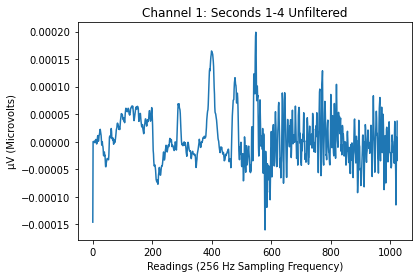

In [22]:
plt.plot(raw_data[0][0:1024])

plt.title('Channel 1: Seconds 1-4 Unfiltered')
plt.ylabel('µV (Microvolts)')
plt.xlabel('Readings (256 Hz Sampling Frequency)')

Text(0.5, 0, 'Readings (256 Hz Sampling Frequency)')

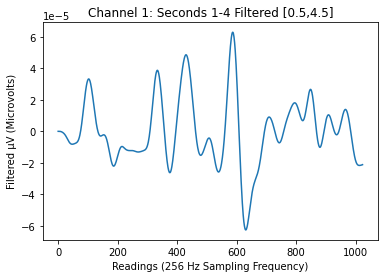

In [29]:
banded = butter_bandpass_filter(raw_data[1], 0.5, 4.5)
plt.plot(banded[0:1024])

plt.title('Channel 1: Seconds 1-4 Filtered [0.5,4.5]')
plt.ylabel('Filtered µV (Microvolts)')
plt.xlabel('Readings (256 Hz Sampling Frequency)')

In [23]:
24 / 6

4.0